In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import joblib

In [2]:
#df = pd.read_csv('../../cyberbullying/data/data.csv')
#df.head()

In [3]:
#df.shape

In [4]:
df_lem = pd.read_csv('../../cyberbullying/data/data_lem.csv')
df_lem.head()

,text,target
0,one make analogy mathematical terms envisionin...,0
1,clarification zundarks right checked wikipedia...,0
2,elected electoral jhk,0
3,fun entry devotchka coworker korea couldnt tel...,0
4,please relate ozone hole increases cancer prov...,0


In [5]:
df_lem.shape

(157203, 2)

In [6]:
def plot_dist(df):
    plt.figure(figsize = (7,7))
    sorted_counts = df['target'].value_counts()
    plt.pie(sorted_counts, labels = ['not bullying', 'bullying'], startangle = 90, counterclock = False,
            wedgeprops = {'width' : 0.6}, autopct='%1.1f%%', pctdistance = 0.7,
            textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
            colors = sns.color_palette("Paired")[7:])
    plt.text(x = -0.35, y = 0, s = f'Total comments: {df.shape[0]}')
    plt.title('Distribution of Comments in the Dataset', fontsize = 16);

In [7]:
#plot_dist(df)

In [8]:
percentage_used = 1
df_sample = df_lem.sample(frac=percentage_used, random_state=0)

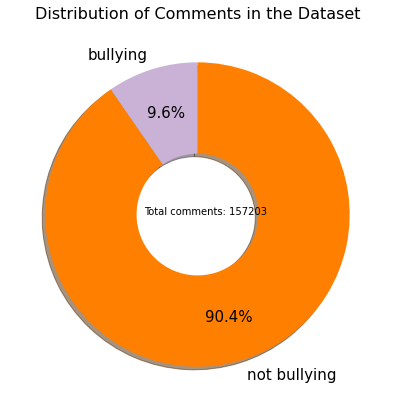

In [9]:
plot_dist(df_sample)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_sample['text'], df_sample['target'], test_size=0.3, random_state=0)

In [11]:
# Instantiate the CountVectorizer method
#count_vector = CountVectorizer(min_df=5)
count_vector = TfidfVectorizer(min_df=5)

# Fit the training data and then return the matrix
X_train_vec = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test_vec = count_vector.transform(X_test)

In [12]:
training_data = X_train_vec
testing_data = X_test_vec

In [13]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [14]:
%%time
# make a list of models
models = [LinearSVC(),          
]

re = pipeline(models, X_train_vec, y_train, X_test_vec, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results = results.sort_values(by = 'F1 Score: Test', ascending = False).reset_index(drop = True)

results

Training LinearSVC
Training LinearSVC finished in 0.64 sec
----------------------------------------------------
CPU times: user 752 ms, sys: 17.3 ms, total: 769 ms
Wall time: 766 ms


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,LinearSVC,0.959628,0.862391,0.682927,0.762238,0.009109,0.978663,0.953463,0.820376,0.881927,0.64066


In [15]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config; set_config(display='diagram')

In [16]:
vectorizer = CountVectorizer()

In [17]:
model = LinearSVC()

In [18]:
preprocessing = make_column_transformer(
    (make_pipeline(vectorizer), 'text')
)

preprocessing

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('countvectorizer',
                                                  CountVectorizer())]),
                                 'text')])

In [19]:
pipe = make_pipeline(
    preprocessing,
    model
)

pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer())]),
                                                  'text')])),
                ('linearsvc', LinearSVC())])

In [20]:
def scores2(cv_results, class_weight):
    score_results = {'class_weight': None, 'accuracy': None, 'precision': None, 'recall': None, 'f1': None, 'time': None}
    for key in score_results.keys():
        if key == 'class_weight':
            score_results[key] = class_weight
        elif key == 'time':
            score_results[key] = round(cv_results['fit_time'].mean() + cv_results['score_time'].mean(), 1)
        else:
            score_results[key] = round(cv_results[f'test_{key}'].mean(), 4)
    return score_results

In [21]:
def tune_threshold(C=1):
    score_results = {'class_weight': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'time': []}

    for class_weight in np.arange(0.05, 0.3, 0.05):
        print(class_weight)
        
        cv_results = cross_validate(LinearSVC(C=C, class_weight={0:class_weight, 1:1-class_weight}),
                                    X_train_vec, y_train, cv=5, n_jobs=-1,
                                    scoring=['accuracy', 'precision', 'recall', 'f1'])

        score_results_new = scores2(cv_results, class_weight)
        
        for key in score_results.keys():
            score_results[key].append(score_results_new[key])
            
        
    plt.figure(figsize=(12,6))
        
    plt.plot(score_results['class_weight'], score_results['recall'], c='r', label='recall')
    plt.plot(score_results['class_weight'], score_results['precision'], c='b', label='precision')    
    plt.plot(score_results['class_weight'], score_results['f1'], c='g', label='f1')
    plt.xlabel('class weight')
    plt.ylabel('score')
    plt.legend()
    plt.grid(alpha=0.3)
        
    return score_results
        

0.05
0.1
0.15000000000000002
0.2
0.25


{'class_weight': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25],
 'accuracy': [0.9128, 0.9407, 0.9494, 0.9535, 0.9559],
 'precision': [0.5306, 0.6534, 0.7159, 0.7582, 0.7902],
 'recall': [0.884, 0.8312, 0.7939, 0.7654, 0.7432],
 'f1': [0.6631, 0.7316, 0.7529, 0.7617, 0.766],
 'time': [1.7, 1.4, 1.0, 1.0, 1.0]}

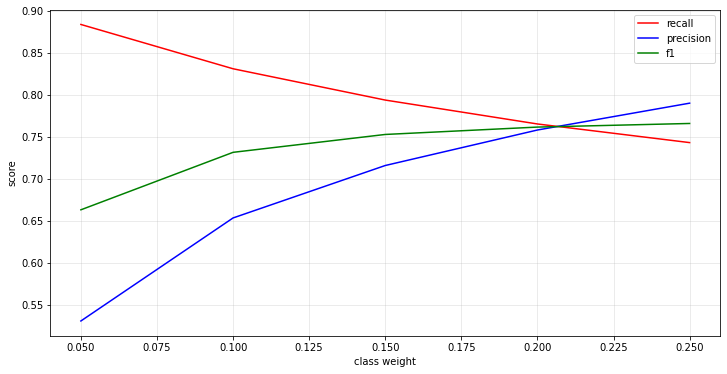

In [22]:
tune_threshold()

0.05
0.1
0.15000000000000002
0.2
0.25


{'class_weight': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25],
 'accuracy': [0.8851, 0.9385, 0.9515, 0.9554, 0.9577],
 'precision': [0.4546, 0.6414, 0.7368, 0.7892, 0.8309],
 'recall': [0.9128, 0.8316, 0.7789, 0.7377, 0.7092],
 'f1': [0.6069, 0.7242, 0.7572, 0.7625, 0.7652],
 'time': [0.7, 0.7, 0.7, 0.7, 0.6]}

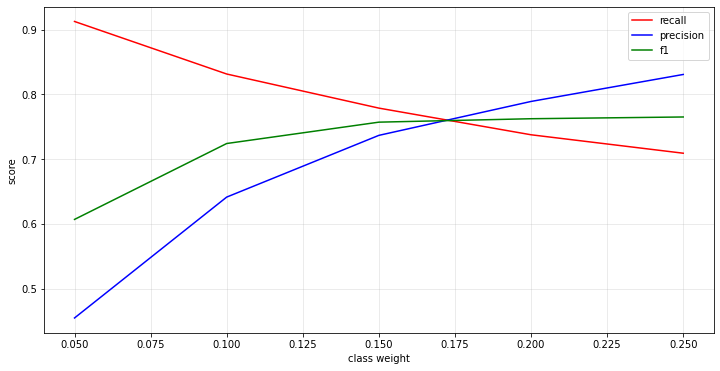

In [23]:
tune_threshold(C=0.25)

0.05
0.1
0.15000000000000002
0.2
0.25


{'class_weight': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25],
 'accuracy': [0.9018, 0.9401, 0.9509, 0.9548, 0.9574],
 'precision': [0.4971, 0.649, 0.727, 0.7731, 0.8103],
 'recall': [0.899, 0.8347, 0.7917, 0.7574, 0.7325],
 'f1': [0.6402, 0.7302, 0.7579, 0.7651, 0.7694],
 'time': [1.1, 1.0, 0.7, 0.7, 0.6]}

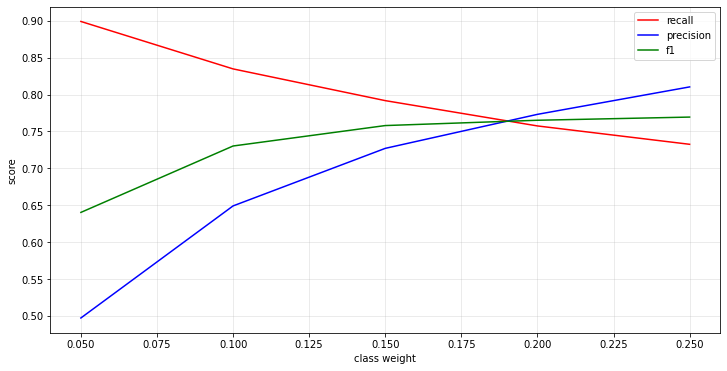

In [24]:
tune_threshold(C=0.5)

0.05
0.1
0.15000000000000002
0.2
0.25


{'class_weight': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25],
 'accuracy': [0.9088, 0.9404, 0.95, 0.9541, 0.9565],
 'precision': [0.5179, 0.6511, 0.7206, 0.7641, 0.7979],
 'recall': [0.8897, 0.8328, 0.7937, 0.7633, 0.7396],
 'f1': [0.6547, 0.7308, 0.7553, 0.7637, 0.7676],
 'time': [1.2, 0.9, 0.8, 0.8, 0.8]}

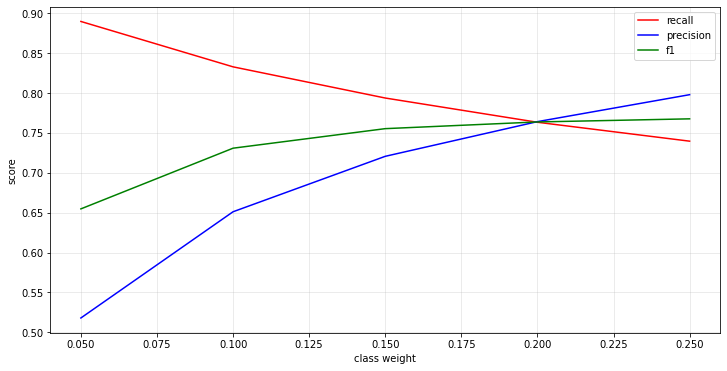

In [25]:
tune_threshold(C=0.75)

In [26]:
from sklearn.svm import SVC

In [27]:
class_weight = {0:0.21, 1:0.79}
model = LinearSVC(class_weight=class_weight)
#model = SVC(kernel='linear', class_weight=class_weight)

model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

In [28]:
y_pred.sum()

4569

In [29]:
y_test.sum()

4469

In [30]:
(y_test - y_pred).value_counts()

 0    45079
-1     1091
 1      991
Name: target, dtype: int64

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

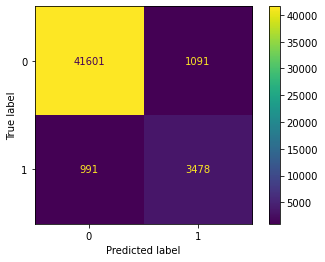

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

In [33]:
def conf_mx_metrics(cm):
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    recall = np.round_(TP/(TP+FN),3)
    precision = np.round_(TP/(TP+FP),3)
    accuracy = np.round_((TP+TN)/(TP+TN+FP+FN),3)
    
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")

In [34]:
conf_mx_metrics(cm)

Recall: 0.778
Precision: 0.761
Accuracy: 0.956


In [35]:
def best_threshold(thresholds_list,model,x_test,y_test):
    recalls=[]
    accuracies=[]
    precisions=[]
    F1_scores=[]
    for threshold in thresholds:
        y_pred=threshold_modifier(model,x_test,threshold)
        cm = confusion_matrix(y_test, y_pred)
        recall, precision, accuracy,F1_score=conf_mx_metrics2(cm)
        recalls.append(recall)
        accuracies.append(accuracy)
        precisions.append(precision)
        F1_scores.append(F1_score)     

    metrics={'thresholds': thresholds,'recall':recalls, 'accuracy': accuracies, 'precision':precisions,'F1_score':F1_scores}
    return metrics

In [42]:
def threshold_modifier(model,xtest,threshold):
    ypred=model._predict_proba_lr(xtest)[:,1]>threshold
    ypred=ypred.astype(int)
    return ypred

In [43]:
model._predict_proba_lr(X_test_vec)

array([[0.37382535, 0.62617465],
       [0.7958928 , 0.2041072 ],
       [0.89422348, 0.10577652],
       ...,
       [0.59284584, 0.40715416],
       [0.76606378, 0.23393622],
       [0.79861349, 0.20138651]])

In [47]:
def conf_mx_metrics2(cm):
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    recall = np.round_(TP/(TP+FN),3)
    precision = np.round_(TP/(TP+FP),3)
    accuracy = np.round_((TP+TN)/(TP+TN+FP+FN),3)
    F1=(2*precision*recall)/(precision+recall)
    
    return recall, precision, accuracy, F1

In [51]:
thresholds= np.arange(0.1, 0.9, 0.05)
thres = best_threshold(thresholds,model,X_test_vec,y_test)

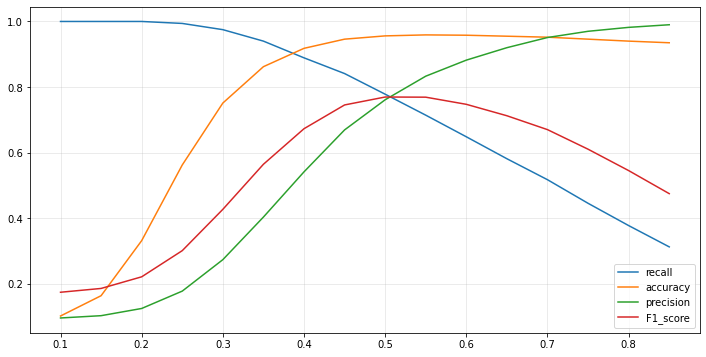

In [56]:
plt.figure(figsize=(12,6))
plt.plot(thresholds, thres['recall'], label='recall')
plt.plot(thresholds, thres['accuracy'], label='accuracy')
plt.plot(thresholds, thres['precision'], label='precision')
plt.plot(thresholds, thres['F1_score'], label='F1_score')
plt.grid(alpha=0.3)
plt.legend();

In [ ]:
X_train_vec

In [ ]:
tune_threshold(C=1)

In [ ]:
%%time
cv_results = cross_validate(LinearSVC(class_weight={0:.1, 1:.9}), X_train_vec, y_train, cv=5, n_jobs=-1,
                            scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
def scores(cv_results):
    score_results = {'accuracy': None, 'precision': None, 'recall': None, 'f1': None, 'time': None}
    for key in score_results.keys():
        if key == 'time':
            score_results[key] = round(cv_results['fit_time'].mean() + cv_results['score_time'].mean(), 1)
        else:
            score_results[key] = round(cv_results[f'test_{key}'].mean(), 4)
    return score_results

In [ ]:
scores(cv_results)

In [ ]:
pipe.get_params()

In [ ]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
#plt.text(9.2, 1, textstr, fontsize=14,
#        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [ ]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

In [ ]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
#plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

## Tunning Hyperparameters

In [ ]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print(f"Best Parameters: {grid_fit.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, best_predictions):.4f}")
    print(f"F1-score: {f1_score(y_test, best_predictions):.4f}")
    print(f"Precision: {precision_score(y_test, best_predictions):.4f}")
    print(f"Recall: {recall_score(y_test, best_predictions):.4f}")
    
    return best_clf

In [ ]:
%%time
# Linear SVC
param_grid = {
    'C': [0.25, 0.5, 0.75, 1]
}

clf_linsvc = LinearSVC(max_iter=10000, dual=True)

best_clf_linsvc = param_tuning(clf_linsvc, param_grid, training_data, y_train, testing_data, y_test)

In [ ]:
%%time
# Stochastic Gradient Descent
param_grid = {
    'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

best_clf_sgd = param_tuning(clf_sgd, param_grid, training_data, y_train, testing_data, y_test)

In [ ]:
X_train_vec

In [ ]:
results_tunned = {'Model':[], 'Best Parameters':[], 'Accuracy':[], 'F1-score':[], 'Precision':[], 'Recall':[]}

for model in [best_clf_sgd, best_clf_linsvc]:
    best_predictions = model.predict(X_test_vec)
    results_tunned['Model'].append(model.__class__.__name__)
    results_tunned["Best Parameters"].append(model.get_params())
    results_tunned["Accuracy"].append(accuracy_score(y_test, best_predictions))
    results_tunned["F1-score"].append(f1_score(y_test, best_predictions))
    results_tunned["Precision"].append(precision_score(y_test, best_predictions))
    results_tunned["Recall"].append(recall_score(y_test, best_predictions))

#results_tunned
results_tunned = pd.DataFrame(results_tunned).sort_values(by = 'F1-score', ascending = False)
results_tunned